## kNNアルゴリズム
k Nearest Neighborといわれる機械学習アルゴリズム
日本語ではk最近傍法（さいきんぼうほう）

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [2]:
# データ取得
df = sns.load_dataset('mpg')
# 欠損値削除
df.dropna(inplace=True)

# 特徴量
X = df['horsepower'].values.reshape(-1, 1)
# 推定値
y = df['mpg'].values

# hold-outでデータを分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, shuffle=True, random_state=0)

Text(0, 0.5, 'mpg')

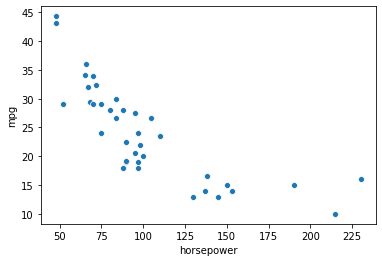

In [3]:
# 散布図
sns.scatterplot(X_train[:, 0], y_train)
plt.xlabel('horsepower')
plt.ylabel('mpg')

In [12]:
# kNN（k=3）
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Text(0, 0.5, 'mpg')

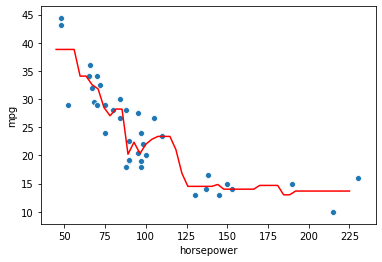

In [13]:
x_axis = np.linspace(45, 225).reshape(-1, 1)
y_pred = model.predict(x_axis)

# 推定値
plt.plot(x_axis, y_pred, 'red')

# 散布図
sns.scatterplot(X_train[:, 0], y_train)
plt.xlabel('horsepower')
plt.ylabel('mpg')

In [33]:
# データ取得
df = sns.load_dataset('mpg')
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values


score_list = []

# kNN（k=3）
k_list = np.arange(1, 30)
for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)

    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    score_list.append(-np.mean(scores))

print('Best performance: k={} score={}'.format(score_list.index(np.min(score_list))+1, np.min(score_list)))

Best performance: k=19 score=18.349417604637846


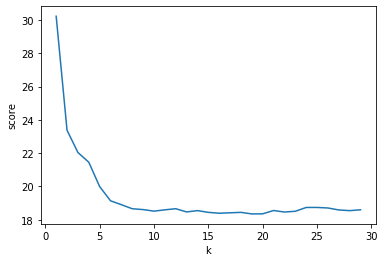

In [23]:
plt.plot(k_list, score_list)
plt.xlabel('k')
plt.ylabel('score')
plt.show()